In [ ]:
import os  
import pandas 
import numpy  
import cv2 as opcv

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error   
from matplotlib import pyplot
from skimage.feature import local_binary_pattern

import tensorflow as tf                                                          
import keras_preprocessing   

In [ ]:
# #inisialisasi local binary pattern
# radius = 3
# n_points = 8 * radius
# METHOD = 'uniform'
# pyplot.rcParams['font.size'] = 9

path = "D:\\Download\\Compressed\\dataset_bola\\dataset_bola\\"

In [ ]:
#fungsi untuk preprocessing citra
def praproses(x):
    #aplikasi gaussian blur untukn smoothing citra dengan filter 3x3
    gaussian = opcv.GaussianBlur(x, (3, 3), 0)
    #return hasil citra
    return gaussian

In [ ]:
dataset = []
response = []

j=0
for folder in os.listdir(path):
    # membaca setiap citra yang ada dalam 
    for filename in os.listdir(path+folder):
        img = opcv.imread(path+folder+"\\"+filename,0)
        img = opcv.resize(img,(150,150))

        pre_img = praproses(img)
        dataset.append(pre_img)
        response.append(j)
    j+=1

dataset = numpy.array(dataset).astype(numpy.float32)
response = numpy.array(response).astype(numpy.float32)

In [ ]:
model = tf.keras.models.Sequential([                                                  #Membentuk model sequential
                                                                                      #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,1)),  #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                        #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                   #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                   #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                   #Layer output
])

model.summary()                                                                      #Menampilkan summary model
Model: "sequential_2"

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='rmsprop',                                                #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam')
              metrics=['accuracy'])   

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
train_list, test_list, train_res, test_res = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [ ]:
history = model.fit(train_list, train_res,epochs=100, validation_data=(test_list, test_res))

Epoch 1/100
4/4 [==============================] - 4s 705ms/step - loss: 43.8363 - accuracy: 0.3583 - val_loss: 3.7149 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 2s 582ms/step - loss: 1.4953 - accuracy: 0.5250 - val_loss: 0.7810 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 2s 568ms/step - loss: 1.1656 - accuracy: 0.5750 - val_loss: 1.4810 - val_accuracy: 0.4667
Epoch 4/100
4/4 [==============================] - 2s 570ms/step - loss: 0.7863 - accuracy: 0.7167 - val_loss: 0.6691 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 2s 578ms/step - loss: 0.4403 - accuracy: 0.8333 - val_loss: 1.4447 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 2s 612ms/step - loss: 0.4286 - accuracy: 0.8417 - val_loss: 0.6054 - val_accuracy: 0.7333
Epoch 7/100
4/4 [==============================] - 2s 587ms/step - loss: 0.3409 - accuracy: 0.8333 - val_loss: 1.9347 - val_accuracy: 0.5333
Epoch 8/100


In [ ]:
cnn_predik = model.predict(test_list)
cnn_predik = cnn_predik.tolist()
cnn_true= []

for i in cnn_predik:
    x = max(i)
    
    cnn_true.append(i.index(x))

cnn_true=numpy.array(cnn_true)
print(cnn_true)

1/1 [==============================] - 0s 187ms/step
[2 1 0 2 0 2 0 1 2 1 2 1 1 1 1 0 1 1 2 0 2 1 1 0 2 0 2 2 1 2]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

cnn_acc = accuracy_score(test_res, cnn_true)
print(cnn_acc*100)

80.0


In [ ]:
test_loss, test_acc = model.evaluate(test_list, test_res)
print(test_acc)

1/1 [==============================] - 0s 85ms/step - loss: 1.9692 - accuracy: 0.8000
0.800000011920929


In [ ]:

print('------------------------ confusion matrix  ------------------------------')
label=[0,1,2]
label = numpy.array(label)
cf_matrix=confusion_matrix(test_res, cnn_true)
print(cf_matrix)
print('--------------------- classification report  ----------------------------')
print(classification_report(test_res, cnn_true))

------------------------ confusion matrix  ------------------------------
[[ 7  1  3]
 [ 0 11  2]
 [ 0  0  6]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78        11
         1.0       0.92      0.85      0.88        13
         2.0       0.55      1.00      0.71         6

    accuracy                           0.80        30
   macro avg       0.82      0.83      0.79        30
weighted avg       0.87      0.80      0.81        30



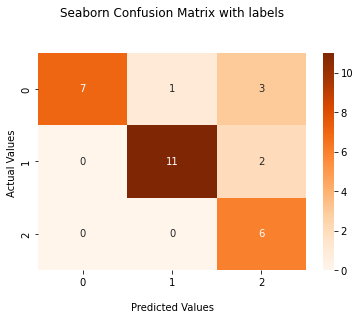

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2])
ax.yaxis.set_ticklabels([0,1,2])

## Display the visualization of the Confusion Matrix.
pyplot.show()